In [1]:
import torch, os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [2]:
! wget https://github.com/bsotomayorg/Intro_HPC_Python/raw/refs/heads/main/datasets/AllenData/ii_spike_times.npy
! wget https://github.com/bsotomayorg/Intro_HPC_Python/raw/refs/heads/main/datasets/AllenData/spike_times.npy
! wget https://github.com/bsotomayorg/Intro_HPC_Python/raw/refs/heads/main/datasets/AllenData/stim_label.npy

--2025-03-25 16:21:46--  https://github.com/bsotomayorg/Intro_HPC_Python/raw/refs/heads/main/datasets/AllenData/ii_spike_times.npy
Résolution de github.com (github.com)… 140.82.114.3
connecté. à github.com (github.com)|140.82.114.3|:443… 
302 FoundTTP transmise, en attente de la réponse… 
Emplacement : https://raw.githubusercontent.com/bsotomayorg/Intro_HPC_Python/refs/heads/main/datasets/AllenData/ii_spike_times.npy [suivant]
--2025-03-25 16:21:46--  https://raw.githubusercontent.com/bsotomayorg/Intro_HPC_Python/refs/heads/main/datasets/AllenData/ii_spike_times.npy
Résolution de raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
connecté. à raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443… 
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 3200128 (3,1M) [application/octet-stream]
Enregistre : ‘ii_spike_times.npy.1’

ii_spike_times.npy. 100%[===================>]   3,05M  14,4MB/s    d

In [3]:
spike_times    = np.load("spike_times.npy")
ii_spike_times = np.load("ii_spike_times.npy")
stim_label     = np.load("stim_label.npy")

In [4]:
spike_times.shape

(153635,)

In [5]:
ii_spike_times.shape

(200, 1000, 2)

In [18]:
stim_label

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  45,  45,
        45,  45,  45,  45,  45,  45,  45,  45,  45,  45,  45,  45,  45,
        45,  45,  45,  45,  45,  45,  45,  45,  45,  45,  45,  45,  45,
        45,  45,  45,  45,  45,  45,  45,  45,  45,  45,  45,  45,  45,
        45,  45,  45,  45,  45,  45,  45,  45,  45,  90,  90,  90,  90,
        90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,
        90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,
        90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,
        90,  90,  90,  90,  90,  90,  90, 135, 135, 135, 135, 135, 135,
       135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135,
       135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 13

In [43]:
def get_binned_raster(spike_times, ii_spike_times, T, nbins=100):
  # it assumes spike times are defined in [0, T]
  # T: window lenght (in seconds)
  M = ii_spike_times.shape[0] # is the total number of samples (recordings with different labels)
  N = ii_spike_times.shape[1]
  mat = np.zeros(shape=(M, N, nbins), dtype=float)
  st_max = 0
  for i_M in range(M):
    for i_N in range(N):
      st = spike_times[ii_spike_times[i_M,i_N,0]:ii_spike_times[i_M,i_N,1]].copy()
      st = st*(nbins/T)
      if st>st_max: st_max = st
      mat[i_M, i_N, st.astype(int)] += 1
      #mat[i_M, i_N, st.astype(int)] |= True
  return mat

In [44]:
ii_spike_times.shape

(200, 1000, 2)

In [45]:
ii_spike_times[0,2]

array([1, 2])

In [46]:
spike_times.min()

np.float64(1.556491042720154e-07)

In [58]:
data = get_binned_raster(spike_times, ii_spike_times[:,:,:], T=1,nbins=1000)

In [59]:
np.unique(data)

array([0., 1.])

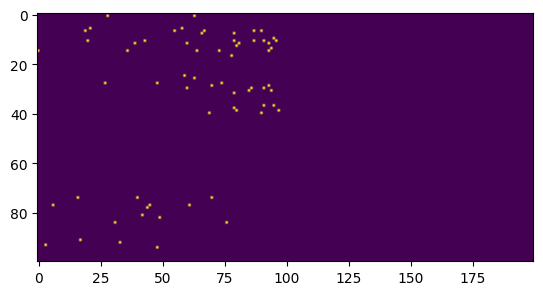

In [62]:
plt.imshow(data[3,100:200,:200])